12. Dado el siguiente sistema de  ecuaciaciones diferenciales:
$$ 3x' + 7x - 5y + 3y' = 41 e^t cos(t) - 22 e^t sen(t) $$
$$ 5x' - 8x - 9y + 5' = -32 e^t cost(t) - 36 e^t sen(t) $$

Con las condiciones iniciales: $  x(0)= 5, \ \ y(0) = 3 $

Determinar la solución aproximada para $ 0 \leq t \leq 2/25, \ \ \ con \ \ h = 1/50 $

### Solución
Paso 1: Designamos como A y B a las partes que no tienen derivadas en cada ecuación:
$$ 3x' + 7x - 5y + 3y' = A $$
$$ 5x' - 8x - 9y + 5' = B $$

Ocupo operadores diferenciales (ver operaciones a mano abajo)

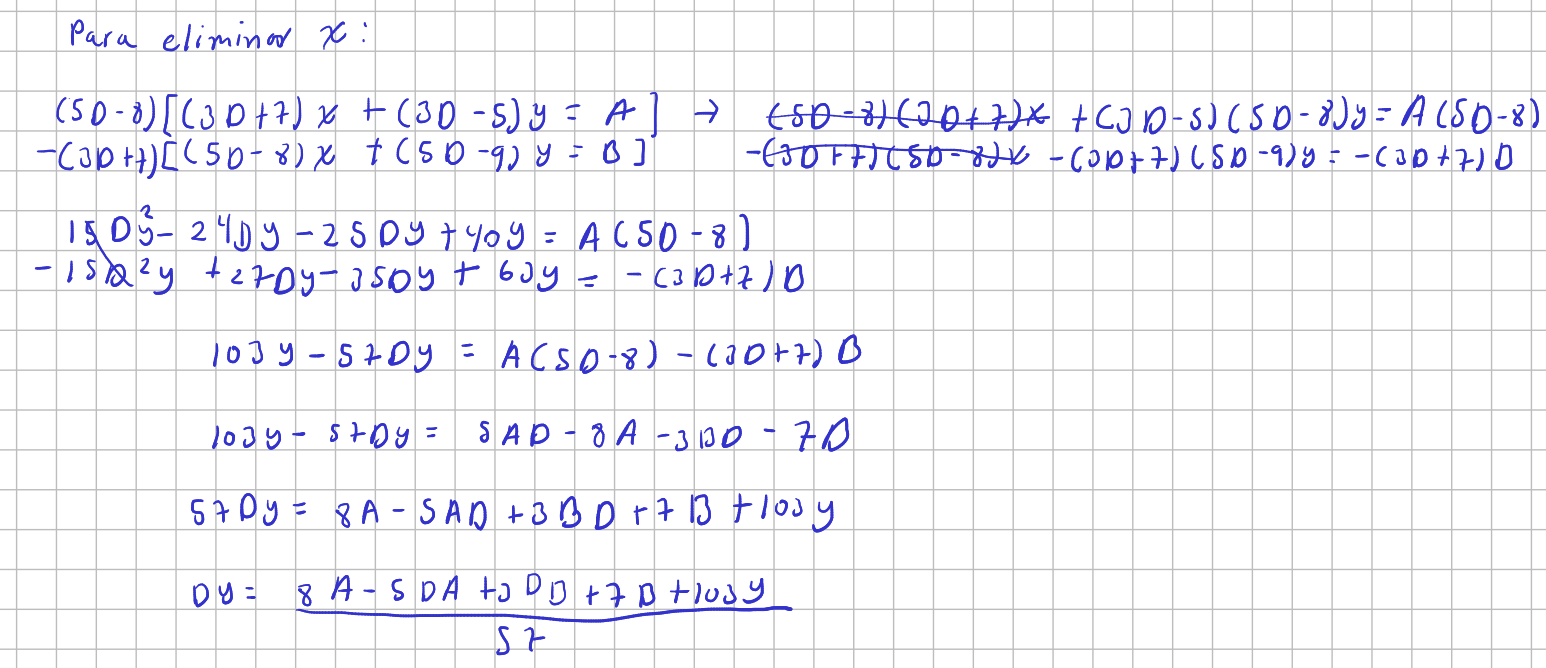
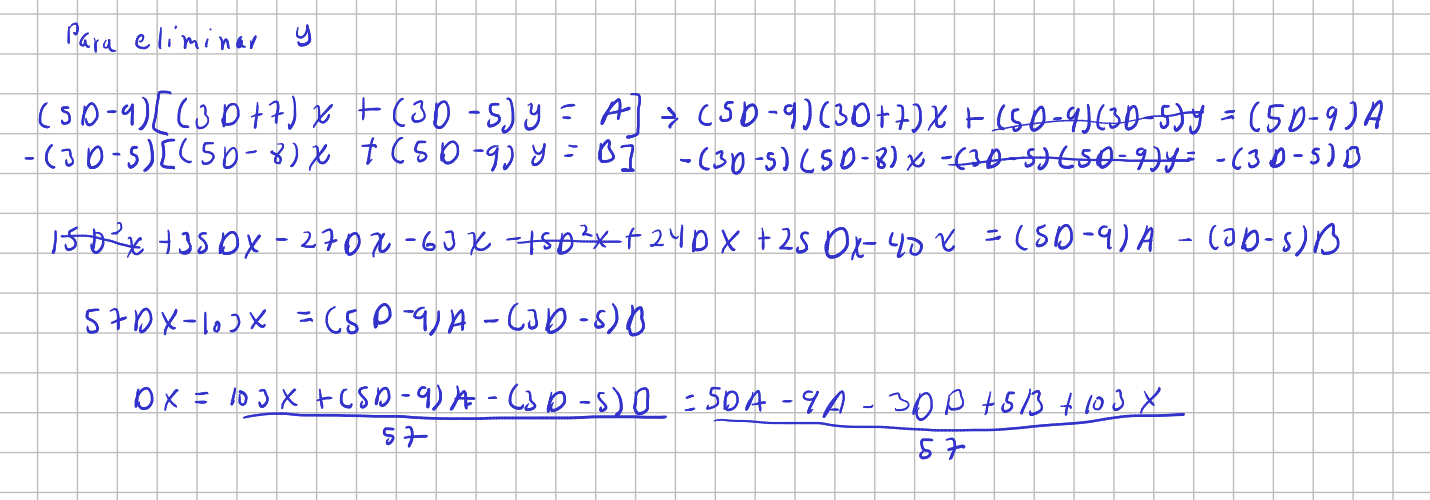

Desarrollando y simplificando *algebráicamente* tengo:

$$ Dx = \frac{5DA - 9A - 3DB + 5B + 103x}{57} $$
$$ Dy = \frac{8A - 5DA + 3DB + 7B + 103y}{57} $$


Con esto pasamos a Python a declarar todos los datos para resolever

In [5]:
from sympy import *

# Declaramos las variable a utilizar
x, y, t= symbols("x y t")

h= 1/50

# Ingresamos nuestras funciones A y B
A = 41*exp(t)*cos(t) - 22*exp(t)*sin(t)
B = -32*exp(t)*cos(t) - 36*exp(t)*sin(t)

# Ahora pasamos el despeje de Dx y Dy en dos funcios F y G
f = (5 * A.diff() - 9*A - 3 * B.diff() + 5*B + 103*x) / 57
g = (8*A - 5*A.diff() + 3*B.diff() + 7*B + 103*y) / 57

display(f)
display(g)

103*x/57 - 5*exp(t)*sin(t) - 230*exp(t)*cos(t)/57

103*y/57 - 125*exp(t)*sin(t)/57 - 65*exp(t)*cos(t)/19

In [6]:
from numpy import arange
# creamos nuestro intervalo
T = [t for t in arange(start=0, stop=0.08 + h/2,step=h)]
T

[0.0, 0.02, 0.04, 0.06, 0.08]

In [7]:
# Ahora vamos a generar todas nuestras K y T

# Declaro la lista con x(0) = 5, y(0)=3

X = [5]
Y = [3]
K11 = [0]
K12 = [0]
K21 = [0]
K22 = [0]
K31 = [0]
K32 = [0]
K41 = [0]
K42 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k11 = f.subs({t: T[i-1], x: X[i-1]})
    k12 = g.subs({t: T[i-1], y: Y[i-1]})
    k21 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k11*h)/2})
    k22 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k12*h)/2})
    k31 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k21*h)/2})
    k32 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k22*h)/2})
    k41 = f.subs({t: T[i-1] + h, x: X[i-1] + k31*h})
    k42 = g.subs({t: T[i-1] + h, y: Y[i-1] + k32*h})
    K11.append(k11)
    K12.append(k12)
    K21.append(k21)
    K22.append(k22)
    K31.append(k31)
    K32.append(k32)
    K41.append(k41)
    K42.append(k42)
    X.append(float(X[i-1] + (h/6)*(k11+2*k21+2*k31+k41)))
    Y.append(float(Y[i-1] + (h/6)*(k12+2*k22+2*k32+k42)))


display(X)
display(Y)

[5,
 5.0999865326203135,
 5.1998911825983365,
 5.299629069954896,
 5.3991119867983555]

[3,
 3.0395892533392272,
 3.078313380356693,
 3.1161054694532955,
 3.152896639008873]

In [8]:
# Desplegamos en una tabla los resultados de las aproximaciones y las K
from utils import imprimir_tabla

# Primero una lista para los datos principales
lista_aproximaciones = [["ti", "Yi", "Xi"]]

for i in range(len(T)):
    lista_aproximaciones.append(
        [
            str(float(T[i])),
            str(float(X[i])),
            str(float(Y[i]))
        ]
    )

# Ahora una lista de las K de x
lista_k1 = [["k11", "k21", "k31", "k41"]]

for i in range(len(T)):
    lista_k1.append(
        [
            str(float(K11[i])),
            str(float(K21[i])),
            str(float(K31[i])),
            str(float(K41[i]))
        ]
    )

# Finalmente una lista de las K de y
lista_k2 = [["k12", "k22", "k32", "k42"]]

for i in range(len(T)):
    lista_k2.append(
        [
            str(float(K12[i])),
            str(float(K22[i])),
            str(float(K32[i])),
            str(float(K42[i]))
        ]
    )

print("Tabla de aproximaciones")
imprimir_tabla(lista_aproximaciones)

print("Tabla de k para x")
imprimir_tabla(lista_k1)

print("Tabla de k para y")
imprimir_tabla(lista_k2)

Tabla de aproximaciones


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ ti   ┃ Yi                 ┃ Xi                 ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0  │ 5.0                │ 3.0                │
│ 0.02 │ 5.0999865326203135 │ 3.0395892533392272 │
│ 0.04 │ 5.1998911825983365 │ 3.078313380356693  │
│ 0.06 │ 5.299629069954896  │ 3.1161054694532955 │
│ 0.08 │ 5.3991119867983555 │ 3.152896639008873  │
└──────┴────────────────────┴────────────────────┘

Tabla de k para x


┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ k11               ┃ k21               ┃ k31               ┃ k41               ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0.0               │ 0.0               │ 0.0               │ 0.0               │
│ 5.0               │ 4.999499685117892 │ 4.999490644340198 │ 4.997979127177958 │
│ 4.997973199678862 │ 4.995430907456526 │ 4.995384967790051 │ 4.991790043234927 │
│ 4.991784532955785 │ 4.987119003638016 │ 4.987034696704729 │ 4.98127427332655  │
│ 4.981269201791704 │ 4.974397592253281 │ 4.974273421063375 │ 4.966263824613019 │
└───────────────────┴───────────────────┴───────────────────┴───────────────────┘

Tabla de k para y


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k12                ┃ k22                ┃ k32                ┃ k42                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0                │ 0.0                │
│ 2.0                │ 1.9797811168316035 │ 1.9794157580655782 │ 1.958382251973751  │
│ 1.9583839472777043 │ 1.9365435990323934 │ 1.936148940107961  │ 1.9134690796812808 │
│ 1.913471154526483  │ 1.8899609932019854 │ 1.8895361604622622 │ 1.8651612671257447 │
│ 1.8651637353081623 │ 1.839934802619263  │ 1.8394789113794463 │ 1.8133597033676865 │
└────────────────────┴────────────────────┴────────────────────┴────────────────────┘